In [49]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def consulta_desde_archivo(sql):
    # Lee el contenido del archivo SQL
    with open(sql, "r") as file:
        sql = file.read()

    # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
    cliente = bigquery.Client()
    df_resultado = cliente.query(sql).to_dataframe()
    print(df_resultado.head(2))
    return df_resultado

def asignar_cuadrantes(df, names, condiciones, etiquetas):
    """
    Segmenta el DataFrame `df` basado en las condiciones proporcionadas
    para un conjunto específico de columnas y asigna la etiqueta especificada.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas a considerar.
    - condiciones: Lista de condiciones correspondientes a las columnas en formato de cadena.
    - etiqueta: Etiqueta a asignar cuando se cumplen las condiciones.
    
    """
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante



In [64]:
# Llama a la función con el nombre de tu archivo SQL
df=consulta_desde_archivo("tada.sql")
# suma_total = df['ordenes'].sum()
# print(f"La suma total es: {suma_total}")
df.shape

                                               td_id  ordenes      money
0  0001a1de3f8c90902ae9b1dd22e5c78ae974887d05f3d1...        1   15107.14
1               0001b68b-18d4-4a28-a7bd-d9ea6787c06d        4  161590.00


(67951, 3)

La suma total es: 152061


In [11]:
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['ordenes'] <= 1].copy()
# Excluir los valores menores o iguales a 1 del DataFrame original
df = df[df['ordenes'] > 1].copy()

[17000. 43800.]


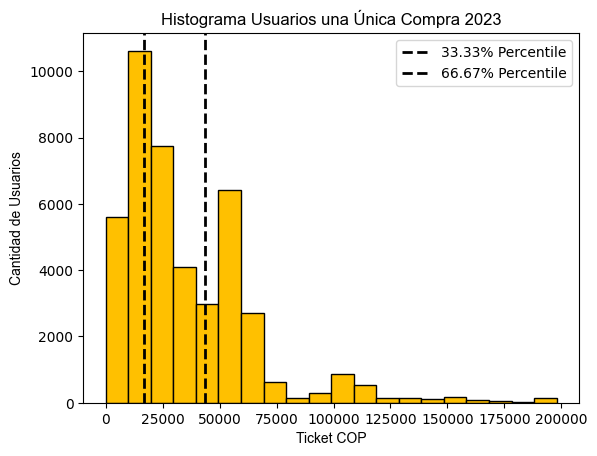

In [25]:
# Calcula el histograma
# Calcula el percentil 99
percentil_90 = np.percentile(menores1.money, 99)

# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = menores1[menores1.money <= percentil_90]

hist, bins = np.histogram(df_subset.money, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.money, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(df_subset.money, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Ticket COP', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios una Única Compra 2023', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [13]:
# Segmentar cuadrantes según condiciones (ejemplo)
menores1['Cuadrante'] = ''
menores1.loc[(menores1['money'] > 43800.), 'Cuadrante'] = 'Hot'
menores1.loc[(menores1['money'] >= 17499.58) & (menores1['money'] <= 43800.), 'Cuadrante'] = 'Warm'
menores1.loc[(menores1['money'] < 17499.58), 'Cuadrante'] = 'Cold'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(index=menores1['Cuadrante'], columns='count')
print(tabla_frecuencias)

col_0      count
Cuadrante       
Cold       14634
Hot        14498
Warm       14805


[ 89500.       167931.234186]


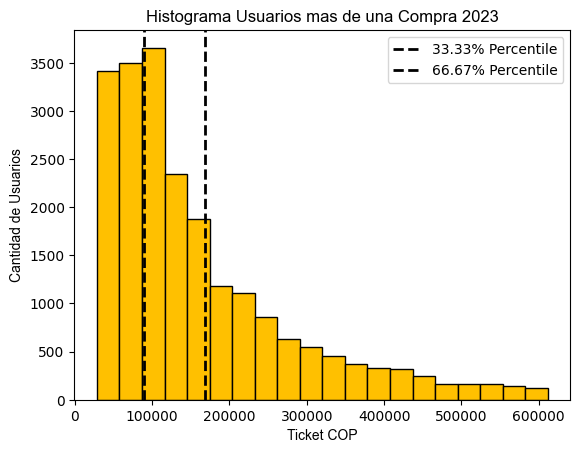

In [62]:

# Calcula el percentil 99
percentil_90 = np.percentile(df.money, 95)
percentil_5 = np.percentile(df.money, 5)
# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.money <= percentil_90]
df_subset = df_subset[df_subset.money >= percentil_5]
# # Redondea la columna 'tu_columna' a 2 decimales
# df_subset.loc['money'] = df_subset['money'].round(2)
# Calcula el histograma
hist, bins = np.histogram(df_subset.money, bins=20)  # Puedes ajustar el número de bins según tu preferencia
# Calcula percentiles
percentiles = np.percentile(df_subset.money, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.money, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Ticket COP', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios mas de una Compra 2023', fontname='Arial')
plt.legend()


# Muestra el histograma
plt.show()

[2.0 4.0]


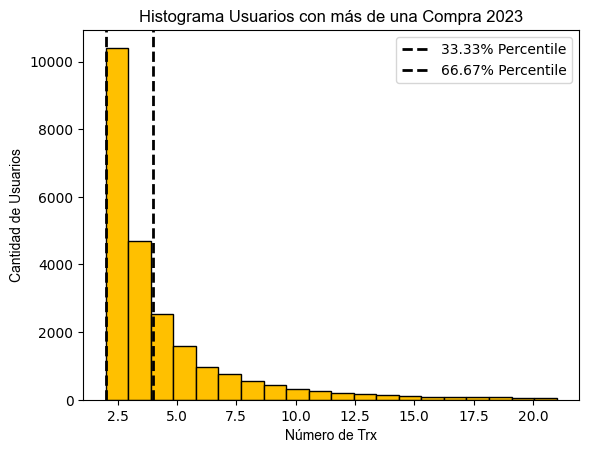

In [36]:
# Calcula el percentil 99
percentil_90 = np.percentile(df.ordenes, 98)
# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.ordenes <= percentil_90]

# Calcula el histograma
hist, bins = np.histogram(df_subset.ordenes, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.ordenes, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.ordenes, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')


# Añade etiquetas y título
plt.xlabel('Número de Trx', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios con más de una Compra 2023', fontname='Arial')
plt.legend()
# Muestra el histograma
plt.show()

In [60]:
# Segmentar en 9 cuadrantes según condiciones (ejemplo)
df['CuadranteMoney'] = ''
df.loc[(df['money'] > 174590.532341), 'CuadranteMoney'] = 'Hot'
df.loc[(df['money'] >= 86000.) & (df['money'] <= 174590.532341), 'CuadranteMoney'] = 'Warm'
df.loc[(df['money'] < 86000.), 'CuadranteMoney'] = 'Cold'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_1 = pd.crosstab(index=df['CuadranteMoney'], columns='count')
print(tabla_frecuencias_1)

col_0           count
CuadranteMoney       
Cold             8001
Hot              8004
Warm             8009


In [41]:
df['CuadranteOrdenes'] = ''
df.loc[(df['ordenes'] > 4), 'CuadranteOrdenes'] = 'Top'
df.loc[(df['ordenes'] >2) & (df['ordenes'] <= 4), 'CuadranteOrdenes'] = 'Regular'
df.loc[(df['ordenes'] <= 2), 'CuadranteOrdenes'] = 'Newbie'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_2 = pd.crosstab(index=df['CuadranteOrdenes'], columns='count')
print(tabla_frecuencias_2)

col_0             count
CuadranteOrdenes       
Newbie            10410
Regular            7214
Top                6390


In [42]:
df.head()

,td_id,ordenes,money,CuadranteMoney,CuadranteOrdenes
1,0001b68b-18d4-4a28-a7bd-d9ea6787c06d,4,161590.00,Warm,Regular
2,0001dd3376517611a308369481b301d55a727b54e41cd5...,4,139000.00,Warm,Regular
3,0001e864352ded6e1a7f47ce661f5b4b346711494e9687...,2,53700.00,Cold,Newbie
6,0004af8b381f375ab3e5fe41c9d38b2d49810ae9aad1fe...,3,160500.00,Warm,Regular
7,0004b4f687e5c7e8cc70daba17cdac6efef9e78980cbe4...,2,49999.68,Cold,Newbie


In [43]:
def asignar_cuadrantes(df, names, condiciones, etiquetas):
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante

In [ ]:
# cuadrante final 
# names = ['CuadranteMoney', 'CuadranteOrdenes']
# CuadranteMoney = ['Cold', 'Warm,', 'Hot']
# CuadranteOrdenes = ['Newbie', 'Regular', 'Top']
# etiquetas=['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']
# df.loc[(df[names[0]] == CuadranteMoney[0]) & (df[names[1]] == CuadranteOrdenes[0]), 'Cuadrante_Final'] = etiquetas[0]
# segmentar_y_etiquetar(df, names, ['==Ice', '==Low'], 'Ice-Low')


In [44]:
names = ['CuadranteMoney', 'CuadranteOrdenes']
condiciones = {
    'CuadranteMoney': ['Cold', 'Warm', 'Hot'],
    'CuadranteOrdenes': ['Newbie', 'Regular', 'Top']
}
etiquetas = ['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']
asignar_cuadrantes(df, names, condiciones, etiquetas)

In [45]:
df.Cuadrante_Final.value_counts()

Cuadrante_Final
1,1    5824
3,3    4955
2,1    3682
2,2    3126
3,2    2145
1,2    1943
2,3    1201
3,1     904
1,3     234
Name: count, dtype: int64

In [47]:
df[df.Cuadrante_Final=='2,3']


,td_id,ordenes,money,CuadranteMoney,CuadranteOrdenes,Cuadrante_Final
170,006db3bb943fdff39a9b67022f9a2cad9040f26f5add83...,9,138449.66,Warm,Top,"2,3"
207,00838e7f-fdcd-4ed5-9aea-69ce11c2c7c7,7,138000.00,Warm,Top,"2,3"
226,009051aa-ebe6-4584-94fe-c694e134c995,6,162073.89,Warm,Top,"2,3"
284,00a8bd396727106b530c5515c869506d3f8a68aed7cd7e...,6,113680.00,Warm,Top,"2,3"
306,00b80a86-6a20-4d23-9cec-2019f4551d0a,7,135425.33,Warm,Top,"2,3"
...,...,...,...,...,...,...
67615,fe924eba83402f1b557e14d7c7e7f7b5e7850c7babfe08...,5,108089.84,Warm,Top,"2,3"
67656,febe58ba51cf9c24d26e6e18bfc26415a917a4c42c1750...,7,148185.00,Warm,Top,"2,3"
67657,febe78e1-bf5e-4c59-a2f6-ee691593af6c,5,130326.99,Warm,Top,"2,3"
67729,ff0436f4673d57bc8da03bf6810370f516dd5b0802f018...,6,164510.64,Warm,Top,"2,3"


In [ ]:
# Guardar el DataFrame como un archivo CSV
df.to_csv('tada.csv', index=False)

In [48]:
# Especificar los detalles de tu conjunto de datos y tabla en BigQuery
project_id = 'abi-martech-maz-col'  # Reemplaza con tu ID de proyecto
table_id = 'maz_col_sandbox.tada'  # Reemplaza con tu ID de conjunto de datos
# Guardar el DataFrame en BigQuery
df.to_gbq(table_id, project_id=project_id, if_exists='replace')

In [ ]:
def bigq_todf(sql):
    cliente = bigquery.Client()
    df_resultado = cliente.query(sql).to_dataframe()
    print(df_resultado.head(1))
    return df_resultado


In [ ]:
pp = '''
        SELECT DISTINCT * FROM `abi-martech-maz-col.MIDAS.MIDAS_DASHBOARD_GROUPED_PP`
        WHERE lower(PP) NOT LIKE '%beer%' 
        AND lower(PP) NOT LIKE '%coupon%'
    '''

demo = '''
select
td_id,
genero,
case when edad is null then 0
else
edad
end edad 
from(
select
a.td_id,
a.abi_gender,
a.abi_age edad,
b.abi_gender_predicted,
CASE WHEN a.abi_gender is null then b.abi_gender_predicted
ELSE a.abi_gender
END genero
from
`abi-martech-global.maz_col_cdp_inbound.L2_attributes` a
left join (
  select
  td_id,
  abi_gender_predicted
  from
  (select
key as td_id,
value as abi_gender_predicted
from
`abi-martech-global.maz_col_cdp_outbound.col_predicted_gender`
)
) b
on a.td_id = b.td_id
)
where genero is not null 
'''

In [ ]:
pp=bigq_todf(pp)
demo=bigq_todf(demo)


In [ ]:
demo.head()

In [ ]:
df.head()

In [ ]:
base = pd.merge(df,demo, on='td_id', how='left')
# pd.merge(df, df_resultado, left_on='td_id1', right_on='td_id', how='left')

In [ ]:
base_final = pd.merge(base, pp, left_on='td_id', right_on='td_id1', how='left')

In [ ]:
base_final.head()